In [6]:
# Genetic algorithm to fit a regression line of the form y=mx+b to a 2 variable dataset

import random
import numpy as np

my_data_file = 'temp_data.npy'
data = np.load(my_data_file)

# parameters have been defined before functions so that we do not have to call them in function.
initial_pop_size = 100
mutation_rate = 0.05
num_generations = 5 
chromosome_length = 2
num_survivors = 50 #the number of survivors each generation

# functions

def A(initial_pop_size, chromosome_length):
    # This function returns an array of row length of initial_pop_size and column length of chromosome_length with random numbers
    return np.random.choice(np.linspace(-1,80,num = 5000),size=(initial_pop_size, chromosome_length),replace=False)
    # could vary -100,100

def B(coefficients,data):
    # This function returns fitness score a chromosome passed using coefficients
    k = data.shape[0] # the total number of points in the data set
    return (1./k) * np.sum([(data[j,1]-(coefficients[0] * data[j,0] + coefficients[1]))**2 for j in range(k)])

    
def C(current_pop,data):
    # This function returns a fitness vector (a two dimensional array) that has fitness scores of each chromosome in current_pop corresponding to their position of each chromosome
    return np.array([np.array([x, B(current_pop[x],data)]) for x in range(current_pop.shape[0])])
   


def D(fitness_vector, num_survivors, current_pop):
    # This function selects a random chromosome, but the probability of choosing a chromosome is inversely proportional to the value of its fitness score. (The smaller value the Higher Chance of selection)
    
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors/2, replace=False)
    # returns a list with random values between 0 and len(fitness_vector).
    # The number of choices is num_survivors/2 and the length of list is 'num_survivors/2'

    best = np.argmin(fitness_vector[random_selection,1])
    # It takes an values from 2nd column of fitness vector whose indexes are equal to the values in random_selection.
    # If random selection is [2,3] and fitness_vector is [[0,a],[1,b],[2,c],[3,d],[4,e]] fitness_vector[random_selection, 1] will return 2nd column values of 2nd and 3rd element of fitness_vector that is 'c' and 'd'.
    # np.argmin gives the smallest value from that new selected list, thus the best fitness score of the randomly selected elements.
    
    return current_pop[int(fitness_vector[random_selection[best]][0])]    

    
def E(new_population, survivors):
    # This function crossovers the surviving chromosomes from the roulette wheel selection. It duplicates the genes and mixes them with genes of other chromosomes
       
    duplicate_survivors = np.zeros((((new_population.shape[0] - len(survivors))),survivors.shape[1]))
    #creates an array with same number of columns as survivors (survivors.shape[1] gives number of columns) and number of rows equal to empty space in new population (size of new_population - size of survivors)
      
    for x in range(survivors.shape[1]): # for each column in the survivor array
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0)
        # duplication of each survivor
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
         #randomizes the elements of that column
        
    
    return np.matrix(duplicate_survivors)

def F(array): # currently does nothing
    return array
     

   
#########################################################################
# Start of main program
current_pop = A(initial_pop_size, chromosome_length)
new_population = np.zeros((num_survivors * 5, current_pop.shape[1]))

# main loop
for i in range(num_generations):
    
    fitness_vector = C(current_pop, data)
    survivors = np.zeros((num_survivors, chromosome_length))
    for n in range(len(survivors)):
        survivors[n] = D(fitness_vector, num_survivors, current_pop)
    new_population[:len(survivors)] = survivors
    new_population[len(survivors):] = E(new_population, survivors)
    
    new_population = F(new_population)
    current_pop = new_population
    new_population = np.zeros((num_survivors * 5, current_pop.shape[1]))

fitness_vector = C(current_pop, data)
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print "The best solution is", best_solution
print "with error equal to approximately", B(best_solution,data)

    
    

The best solution is [  0.44208842  73.37287457]
with error equal to approximately 26.9820516089


In [20]:
# scipy regression function to compare your solutions with
from scipy import stats
print stats.linregress(data)[0:2]

(0.53992593932107447, 70.709972206845848)


The best solution is [  0.52310462  72.4654931 ]
with error equal to approximately 25.7960359327


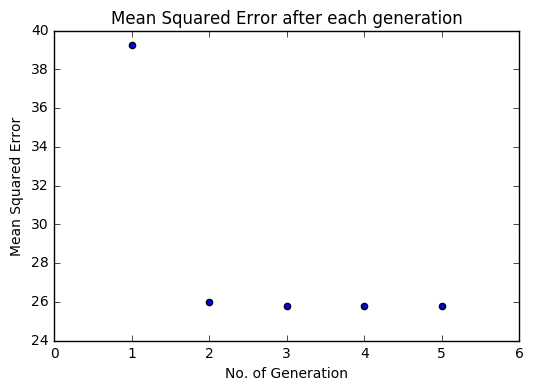

In [8]:
# It gives the 
import random
import numpy as np

my_data_file = 'temp_data.npy'
data = np.load(my_data_file)

# parameters have been defined before functions so that we do not have to call them in function.
initial_pop_size = 1000
mutation_rate = 0.5
num_generations = 5 
chromosome_length = 2
num_survivors = 50 #the number of survivors each generation

# functions

def A():
     
    return np.random.choice(np.linspace(-1,80,num = 5000),size=(initial_pop_size, chromosome_length),replace=False)
    # could vary -100,100

    
#Optimized code.
def B(coefficients):
   
    k = data.shape[0] # the total number of points in the data set
    return (1./k) * np.sum([(data[:,1]-(coefficients[0] * data[:,0] + coefficients[1]))**2])
    
    # more advanced Python practitioners might note that this could be vectorized
    
def C():
    return np.array([np.array([x,B(current_pop[x])]) for x in range(current_pop.shape[0])])
    # the above populates an array using a 'list comprehension' 
    
def D():
    #
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors/2, replace=False)
    # retuns a list with random values between 0 and len(fitness_vector).
    # The number of choices is num_survivors/2 and the length of list is 'num_survivors/2'

    best = np.argmin(fitness_vector[random_selection,1])
    
    return current_pop[int(fitness_vector[random_selection[best]][0])]
    
    
def E():
    duplicate_survivors = np.zeros((((new_population.shape[0] - len(survivors))),survivors.shape[1]))
    #creates an array with same number of columns as survivors (survivors.shape[1] gives number of columns) and number of rows equal to empty space in new population (size of new_population - size of survivors)
    # The array is intialized with zeros, as every element has a zero.
    
    for x in range(survivors.shape[1]): # for each column in the survivor array
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) # duplicate column 4 times
        # 4 times duplicated because our new_population is (5 * num of survivors)
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x]) #randomizes the elements of that column
         
    return np.matrix(duplicate_survivors)

def F(array,mutation_rate): # currently does nothing
    #takes in 2-D array consisting of chromosomes and mutation_rate rate of mutation
    #returns an array after mutating it.
    
    for i in range(len(array)):
        a = random.random() #generating a random number from 0.01 to 1.0.
        if a <= mutation_rate: #checking whether the generated number is less than random number, if it is it gets mutated
            array[i,0] = array[i,0] * 0.3 #mutation by decreasing the x element by 10%
            array[i,1] = array[i,1] * 1.3 #mutation by increasing the y element by 10%
    return array


########################################################################
# Start of main program
current_pop = A()
new_population = np.zeros((num_survivors * 5, current_pop.shape[1]))



mse = []
# main loop
for i in range(num_generations):
    
    fitness_vector = C()
    survivors = np.zeros((num_survivors, chromosome_length))
    
    #Mean squared error of each best chromosome is added up
    mse.append(B(current_pop[np.argmin(fitness_vector[:,1])]))
    
    for n in range(len(survivors)):
        survivors[n] = D()
    new_population[:len(survivors)] = survivors
    new_population[len(survivors):] = E()
    
    new_population = F(new_population,mutation_rate)
    
    current_pop = new_population
    new_population = np.zeros((num_survivors * 5, current_pop.shape[1]))

    

num = [x+1 for x in range(num_generations)]

fitness_vector = C()
#print fitness_vector
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print "The best solution is", best_solution
print "with error equal to approximately", B(best_solution)
#errors.append(B(best_solution))

#Plotting graphs
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(num,mse)
plt.xlabel("No. of Generation")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error after each generation")
plt.show()  

    